We see it is highly unbalanced, as we have more than 7000 samples we can afford losing some data to balance the target , let's use random under sampler to do this

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(df.iloc[:, 0:21], df['Churn'])

In [ ]:
X_rus.index

Index([2134, 2693, 1679, 5998, 6798, 1994, 1531, 5089, 6560,  707,
       ...
       7008, 7009, 7010, 7011, 7018, 7021, 7026, 7032, 7034, 7041],
      dtype='int64', length=3738)

In [ ]:
df = pd.merge(X_rus,y_rus, left_index=True, right_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 2134 to 7041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3738 non-null   object 
 1   gender            3738 non-null   object 
 2   SeniorCitizen     3738 non-null   int64  
 3   Partner           3738 non-null   object 
 4   Dependents        3738 non-null   object 
 5   tenure            3738 non-null   int64  
 6   PhoneService      3738 non-null   object 
 7   MultipleLines     3738 non-null   object 
 8   InternetService   3738 non-null   object 
 9   OnlineSecurity    3738 non-null   object 
 10  OnlineBackup      3738 non-null   object 
 11  DeviceProtection  3738 non-null   object 
 12  TechSupport       3738 non-null   object 
 13  StreamingTV       3738 non-null   object 
 14  StreamingMovies   3738 non-null   object 
 15  Contract          3738 non-null   object 
 16  PaperlessBilling  3738 non-null   object 
 1

In [ ]:
df.Churn.value_counts()

Churn
No     1869
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

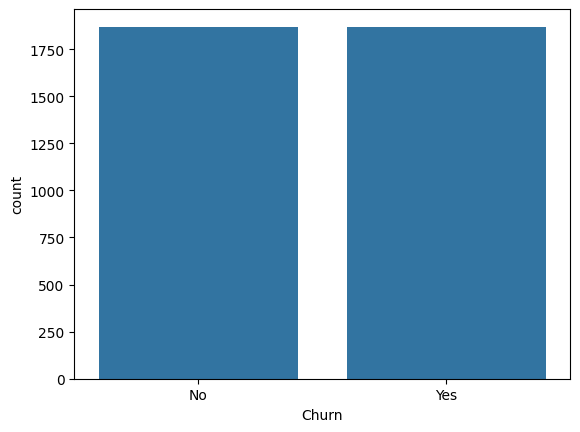

In [ ]:
sns.countplot(x="Churn", data=df)

Now data is balanced, which makes 

In [ ]:
pipe = Pipeline(steps=[("sampler",RandomUnderSampler()),
                        ("model",RandomForestClassifer())])


crossv_rfc = cross_val_score(pipe, X_train, y_train, cv = 5, scoring = "accuracy" )